# Import processed files
Columns include:
- Sender
- Recipient
- Date
- Subject
- Text
- Folder & Directory


# 1. Import required libraries

In [2]:
from google.colab import drive
from google.colab import files
import pandas as pd
from datetime import datetime
import os

# 2. Get Files - Google Colab

Alternatively, drag and drop file from file explorer into the files pane. <i>(This way is a lot faster).</i>

#### Upload Processed Emails
- "processed_emails_top_2mm_lines.csv"

In [20]:
## SKIP THIS STEP IF FILES ALREADY EXIST ##
%%script false --no-raise-error   # Prevents execution

# Upload files
uploaded = files.upload()

# List of uploaded files
print("Uploaded files:", uploaded_dtree.keys())

#### Upload Training Dataset

- "dtree_training_data.csv"

In [21]:
## SKIP THIS STEP IF FILES ALREADY EXIST ##
%%script false --no-raise-error   # Prevents execution

# Upload files
uploaded = files.upload()

# List of uploaded files
print("Uploaded files:", uploaded_main.keys())


#### (OBSOLETE) Get Files - Spyder

In [1]:
## USE WITH SPYDER - OFF BY DEFAULT ##
%%script false --no-raise-error   # Prevents execution

"""
Enron Analysis - Decision Tree

"""

## Main Dataset file path
# Spyder Dir
file_path = r"G:\Academics\Georgia Tech - MS CS\INTA 6450 - Data Analytics & Security\Final Project\enron-analysis-main\enron_analysis\data\data\processed_emails_top_2mm_lines.csv"

# Google Colab Dir
# file_path_gc =



## Wrongdoing Subset for Training
# Spyder Dir
training_data_path = r"G:\Academics\Georgia Tech - MS CS\INTA 6450 - Data Analytics & Security\Final Project\enron-analysis-main\enron_analysis\data\data\dtree_training_data.csv"

# Google Colab Dir
# training_data_path_gc

# Pandas Table Display Options
#pd.set_option('display.max_rows', 10)  # No row limit
#pd.set_option('display.max_columns', None)  # No column limit


# 3. Read files

Our main dataset is the Enron corpus.

After we prep the data in subsequent blocks, columns will include:
- Time of Day
- End of Fiscal Period?
- Contains Wrongdoing Keywords?
- Keyword Density
- Outside Work Hours?
- Multiple Recipients?

In [3]:
# Load datasets into Pandas DataFrames
main = pd.read_csv("processed_emails_top_2mm_lines.csv")
training_data = pd.read_csv("dtree_training_data.csv")


In [4]:
main.head()

,Unnamed: 0,file,message,text,sender,recipient1,recipient2,recipient3,Subject,folder,date
0,0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,Here is our forecast,phillip.allen@enron.com,tim.belden@enron.com,NaN,NaN,NaN,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",2001-05-14 16:39:00-07:00
1,1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,Traveling to have a business meeting takes the...,phillip.allen@enron.com,john.lavorato@enron.com,NaN,NaN,Re:,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",2001-05-04 13:51:00-07:00
2,2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,test successful. way to go!!!,phillip.allen@enron.com,leah.arsdall@enron.com,NaN,NaN,Re: test,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,2000-10-18 03:00:00-07:00
3,3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,"Randy, Can you send me a schedule of the salar...",phillip.allen@enron.com,randall.gay@enron.com,NaN,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,2000-10-23 06:13:00-07:00
4,4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,Let's shoot for Tuesday at 11:45.,phillip.allen@enron.com,greg.piper@enron.com,NaN,NaN,Re: Hello,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,2000-08-31 05:07:00-07:00


In [5]:
training_data.head()

,text,sender,recipient1,recipient2,recipient3,Subject,folder,date,Analysis_Type,Wrongdoing_Flag
0,---------------------- Forwarded by Vince J Ka...,vince.kaminski@enron.com,vkaminski@aol.com,NaN,NaN,LJM,\Vincent_Kaminski_Jun2001_8\Notes Folders\'sen...,2000-02-24 08:49:00-08:00,Network,1.0
1,---------------------- Forwarded by Vince J Ka...,vince.kaminski@enron.com,vkaminski@aol.com,NaN,NaN,LJM Update,\Vincent_Kaminski_Jun2001_8\Notes Folders\'sen...,2000-02-16 23:59:00-08:00,Network,1.0
2,---------------------- Forwarded by Vince J Ka...,vince.kaminski@enron.com,vkaminski@aol.com,NaN,NaN,Re: Model Development Review,\Vincent_Kaminski_Jun2001_8\Notes Folders\'sen...,1999-12-30 08:33:00-08:00,Network,1.0
3,X-Origin: Delainey-DX-FileName: ddelain.nsfTha...,david.delainey@enron.com,mike.jakubik@enron.com,X-From: David W Delainey,X-To: Mike Jakubik,Re: Raptor,X-cc: Raymond Bowen,2000-05-11 07:32:00-07:00,Network,1.0
4,FYI---------------------- Forwarded by David W...,david.delainey@enron.com,steve.pruett@enron.com,NaN,NaN,Re: C-Gas,\David_Delainey_Dec2000\Notes Folders\'sent mail,2000-07-24 09:01:00-07:00,Network,1.0


### "Odd Hours" Component
- Identify records that fall outside of normal working hours. These records have a higher likelihood of being against policy.


In [6]:
# Convert 'date' column to datetime
main['date'] = pd.to_datetime(main['date'], errors='coerce')                      # Main
training_data['date'] = pd.to_datetime(training_data['date'], errors='coerce')    # Training set


## Debugging
# Check for rows where 'date' conversion was unsuccessful
#print("Rows with invalid date format:", main[main['date'].isna()])
#print("Rows with invalid date format:", training_set[training_set['date'].isna()])

<ipython-input-6-26693aa431d9>:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  main['date'] = pd.to_datetime(main['date'], errors='coerce')                      # Main
<ipython-input-6-26693aa431d9>:3: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  training_data['date'] = pd.to_datetime(training_data['date'], errors='coerce')    # Training set


In [7]:
# Extract hour from the 'date' column
#main['Hour'] = main['date'].dt.hour
#training_set['Hour'] = training_set['date'].dt.hour



# Extract hour from the 'date' column
## Convert data Types

# Main Set
main['Hour'] = main['date'].apply(lambda x: x.hour if pd.notnull(x) else None)
print(main['Hour'])

# Training Dataset
#training_data['Hour'] = training_data['date'].apply(lambda x: x.hour if pd.notnull(x) else None)
#print(training_data['Hour'])  # Training data doesn't need Hour column.


0        16
1        13
2         3
3         6
4         5
         ..
31923     3
31924     3
31925     8
31926     5
31927     2
Name: Hour, Length: 31928, dtype: int64


In [8]:
"""
print("File Column:"); print(main['file'].head())

print("\nMessage Column:"); print(main['message'].head())

print("\nText Column:"); print(main['text'].head())

print("\nSender Column:"); print(main['sender'].head())

print("\nRecipient1 Column:"); print(main['recipient1'].head())

print("\nRecipient2 Column:"); print(main['recipient2'].head())

print("\nRecipient3 Column:"); print(main['recipient3'].head())

print("\nSubject Column:"); print(main['Subject'].head())

print("\nFolder Column:"); print(main['folder'].head())

print("\nDate Column:"); print(main['date'].head())

print("\nHour Column:"); print(main['Hour'].head())
"""

'\nprint("File Column:"); print(main[\'file\'].head())\n\nprint("\nMessage Column:"); print(main[\'message\'].head())\n\nprint("\nText Column:"); print(main[\'text\'].head())\n\nprint("\nSender Column:"); print(main[\'sender\'].head())\n\nprint("\nRecipient1 Column:"); print(main[\'recipient1\'].head())\n\nprint("\nRecipient2 Column:"); print(main[\'recipient2\'].head())\n\nprint("\nRecipient3 Column:"); print(main[\'recipient3\'].head())\n\nprint("\nSubject Column:"); print(main[\'Subject\'].head())\n\nprint("\nFolder Column:"); print(main[\'folder\'].head())\n\nprint("\nDate Column:"); print(main[\'date\'].head())\n\nprint("\nHour Column:"); print(main[\'Hour\'].head())\n'

In [9]:
# Function to categorize time of day
def categorize_time(hour):
  if 0 <= hour < 6:
    return "Late Night"
  elif 6 <= hour < 12:
    return "Morning"
  elif 12 <= hour < 18:
    return "Afternoon"
  else:
    return "Evening"


In [10]:
## Identify records that fall outside of normal working hours. These records have a higher likelihood of being against policy.
# 'Time of Day' column
main['Time of Day'] = main['Hour'].apply(categorize_time)

# Flagging outside work hours
main['Outside Work Hours?'] = (main['Hour'] < 9) | (main['Hour'] > 17)

# Enron fiscal period ends in December
main['End of Fiscal Period?'] = main['date'].apply(lambda x: x.month == 12)

# Multiple Recipients?
- Allow decision tree to split on whether multiple people are contacted during innstances of wrongdoing.

In [11]:
# Multiple Recipients
main['Multiple Recipient1?'] = main['recipient1'].str.contains(',', na=False)

# In case we want to look at the cc and bcc list as well. (recipient2 and recipient3)
#main['Multiple Recipient2?'] = main['recipient2'].str.contains(',', na=False)
#main['Multiple Recipient3?'] = main['recipient3'].str.contains(',', na=False)


In [12]:
# Categorical and Binary variables
main[['sender',
      'recipient1',
      'Time of Day',
      'Outside Work Hours?',
      'End of Fiscal Period?',
      'Multiple Recipient1?']].head(10)


,sender,recipient1,Time of Day,Outside Work Hours?,End of Fiscal Period?,Multiple Recipient1?
0,phillip.allen@enron.com,tim.belden@enron.com,Afternoon,False,False,False
1,phillip.allen@enron.com,john.lavorato@enron.com,Afternoon,False,False,False
2,phillip.allen@enron.com,leah.arsdall@enron.com,Late Night,True,False,False
3,phillip.allen@enron.com,randall.gay@enron.com,Morning,True,False,False
4,phillip.allen@enron.com,greg.piper@enron.com,Late Night,True,False,False
5,phillip.allen@enron.com,greg.piper@enron.com,Late Night,True,False,False
6,phillip.allen@enron.com,"david.l.johnson@enron.com, john.shafer@enron.com",Morning,True,False,True
7,phillip.allen@enron.com,joyce.teixeira@enron.com,Morning,True,False,False
8,phillip.allen@enron.com,mark.scott@enron.com,Late Night,True,False,False
9,phillip.allen@enron.com,zimam@enron.com,Morning,True,False,False


### Keyword Analysis

- Identify rows with wrongdoing keywords and calculate density by counting keyword occurrences in the text.

In [13]:
# Keywords
keywords = [
    "between us", "work around this", "X", "cover up", "illegal", "fraud", "embezzle", "bribe", "kickback",
    "misappropriation", "under the table", "unreported", "deceptive", "money laundering", "collusion", "scheme",
    "insider trading", "conflict of interest", "conspiracy", "unethical", "off the books","off book", "off-book", "false documentation",
    "tampering", "conceal", "mislead", "scam", "shady", "falsify", "extortion", "abuse of power", "negligence",
    "coercion", "illegal activity", "misstatement", "secret agreement", "unlawful", "accounting fraud",
    "unreported income", "double-dealing", "bribery", "hush money", "kickback scheme", "insider info", "phoney",
    "illicit", "financial manipulation", "unethical practice", "whistleblower", "dodgy deal","urgent"
]


In [14]:
# Check if any keywords are present in the text column
main["Contains Wrongdoing Keywords?"] = main['text'].str.contains('|'.join(keywords), case=False, na=False)

# Calculate keyword density by counting occurrences of keywords in each row
main['Keyword Density'] = main['text'].str.split().apply(lambda x: sum(word in keywords for word in x if isinstance(x, list)))


In [15]:
%%script false --no-raise-error   # Prevents execution, No need for textblob here - sentiment analysis handled externally.
# Print all columns in the head of the dataframe
print(main.head())
main.describe()

"""
try:
    from textblob import TextBlob
    print("textblob is installed")
except ImportError:
    print("textblob is not installed")


#######
# END OF PREPROCESSING
#######

# Add Wrongdoing Data

### Merging Wrongdoing dim table

Merge wrongdoing records for decision tree. Wrongdoing_Flag will be our dependent variable.

- `Wrongdoing_Flag` = 1 is a message w. wrongdoing.
<br> <br>

### Create and clean merged_df dataframe
Create the new dataframe "merged_df" holding the complete dataset.
- `Wrongdoing_Flag` updated to binary - no nulls or blanks

In [19]:
# Example DataFrames (df1 and df2)
# main
# training_data - Contains wrongdoing flag from our network and sentiment analysis.

# Select the desired columns from df2
training_data_selected = training_data[['text','Analysis_Type', 'Wrongdoing_Flag']]

# Merge the DataFrames
# Assuming you want to merge based on a common column like 'ID' or 'Index'
# Replace 'common_column' with the actual column you want to join on

merged_df = pd.merge(main, training_data_selected, how='left', on='text')

In [31]:
## Remove Nulls and Blanks from Wrongdoing_Flag
merged_df[merged_df['Wrongdoing_Flag'] == 1]# Replace NaN values (nulls) in 'Wrongdoing_Flag' with 0
merged_df['Wrongdoing_Flag'] = merged_df['Wrongdoing_Flag'].fillna(0)

# Replace blank values (if any) in 'Wrongdoing_Flag' with 0
merged_df['Wrongdoing_Flag'] = merged_df['Wrongdoing_Flag'].replace("", 0)

## Convert Wrongdoing Flag to an integer for decision tree boolean.
merged_df['Wrongdoing_Flag'] = merged_df['Wrongdoing_Flag'].astype(int)

In [34]:
# VIEW - Instances of records with wrongdoing
merged_df[merged_df['Wrongdoing_Flag'] == 1].head(3)

,Unnamed: 0,file,message,text,sender,recipient1,recipient2,recipient3,Subject,folder,date,Hour,Time of Day,Outside Work Hours?,End of Fiscal Period?,Multiple Recipient1?,Contains Wrongdoing Keywords?,Keyword Density,Analysis_Type,Wrongdoing_Flag
200,200,allen-p/_sent_mail/275.,Message-ID: <19273922.1075855691259.JavaMail.e...,---------------------- Forwarded by Phillip K ...,phillip.allen@enron.com,mike.grigsby@enron.com,NaN,NaN,Alliance netback worksheet,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,2000-04-06 05:18:00-07:00,5,Late Night,True,False,False,False,0,Sentiment,1
793,793,allen-p/all_documents/274.,Message-ID: <21443533.1075855671478.JavaMail.e...,---------------------- Forwarded by Phillip K ...,phillip.allen@enron.com,mike.grigsby@enron.com,NaN,NaN,Alliance netback worksheet,\Phillip_Allen_Dec2000\Notes Folders\All docum...,2000-04-06 05:18:00-07:00,5,Late Night,True,False,False,False,0,Sentiment,1
1851,1851,allen-p/discussion_threads/46.,Message-ID: <19061745.1075855674272.JavaMail.e...,---------------------- Forwarded by Phillip K ...,phillip.allen@enron.com,mike.grigsby@enron.com,NaN,NaN,Alliance netback worksheet,\Phillip_Allen_Dec2000\Notes Folders\Discussio...,2000-04-06 05:18:00-07:00,5,Late Night,True,False,False,False,0,Sentiment,1


In [27]:
# VIEW - Instances of records with wrongdoing
merged_df[merged_df['Wrongdoing_Flag'] == 0].head(3)

,Unnamed: 0,file,message,text,sender,recipient1,recipient2,recipient3,Subject,folder,date,Hour,Time of Day,Outside Work Hours?,End of Fiscal Period?,Multiple Recipient1?,Contains Wrongdoing Keywords?,Keyword Density,Analysis_Type,Wrongdoing_Flag
0,0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,Here is our forecast,phillip.allen@enron.com,tim.belden@enron.com,NaN,NaN,NaN,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",2001-05-14 16:39:00-07:00,16,Afternoon,False,False,False,False,0,NaN,0.0
1,1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,Traveling to have a business meeting takes the...,phillip.allen@enron.com,john.lavorato@enron.com,NaN,NaN,Re:,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",2001-05-04 13:51:00-07:00,13,Afternoon,False,False,False,False,0,NaN,0.0
2,2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,test successful. way to go!!!,phillip.allen@enron.com,leah.arsdall@enron.com,NaN,NaN,Re: test,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,2000-10-18 03:00:00-07:00,3,Late Night,True,False,False,False,0,NaN,0.0


End of Preprocessing

# Decision Tree

#### Create a decision tree based on:

- Time of Day
- Outside work hours?
- End of fiscal period?
- Contains wrongdoing keywords?
- Keyword density

Flag based on subset of 600 records of wrongdoing.

<i>The decision tree is split so that 80% is training and 20% is testing.</i>

In [35]:
####### DECISION TREE #######
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import pandas as pd

# Enusre Packages are installed. (Had issues w. Spyder)
try:
    from sklearn.model_selection import train_test_split
    print("sklearn is installed")
except ImportError:
    print("sklearn is not installed")



sklearn is installed


In [43]:
# Preprocessing for categorical columns (e.g., "Time of Day")
# You can convert "Time of Day" to numerical values like:
time_of_day_map = {
    "Late Night": 0,
    "Morning": 1,
    "Afternoon": 2,
    "Evening": 3
}

merged_df['Time of Day Map'] = merged_df['Time of Day'].map(time_of_day_map)


Define X and Y variables.

X Variables
- Time of Day
- End of Fiscal Period
- If contains wrongdoing keywords
- Density of Keywords

Y Variables
- If outside of work hours (<b>temporary</b>)

In [44]:
# Input X columns. Our independent variables.
inputs = ['Time of Day Map',
          'End of Fiscal Period?',
          'Contains Wrongdoing Keywords?',
          'Keyword Density',
          'Outside Work Hours?'
          ]

# 'Outside work hours?'


# Target is the column you want to predict. # WIP - we have not coded which emails were fraudulent. Will use 1 for wrongdoing, 0 for no wrongdoing.
target = 'Wrongdoing_Flag' # Temporary Y variable until we code for wrongdoing. Should be 100% accurate.


In [45]:
# Step 1: Prepare feature and target data
X = merged_df[inputs]  # Feature columns
y = merged_df[target]  # Target column

# Step 2: Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create and train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Step 4: Predict the target on the test set
y_pred = clf.predict(X_test)


'\n# Step 5: Evaluate the performance of the model\nprint(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")\nprint("Confusion Matrix:")\nprint(confusion_matrix(y_test, y_pred))\nprint("Classification Report:")\nprint(classification_report(y_test, y_pred))\n\n# Visualization of the Decision Tree\nplt.figure(figsize=(12, 8))\nplot_tree(clf, feature_names=inputs, class_names=[\'Not Flagged\', \'Flagged\'], filled=True, fontsize=10)\nplt.title("Decision Tree for Flagged Emails Prediction")\nplt.show()\n'

Cross-validated accuracy scores: [0.59541985 0.73125856 0.61217698 0.63801879 0.38723571]
Average cross-validated accuracy: 0.59
Accuracy on test set: 0.61
Confusion Matrix:
[[3873 2500]
 [   7    6]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.61      0.76      6373
           1       0.00      0.46      0.00        13

    accuracy                           0.61      6386
   macro avg       0.50      0.53      0.38      6386
weighted avg       1.00      0.61      0.75      6386



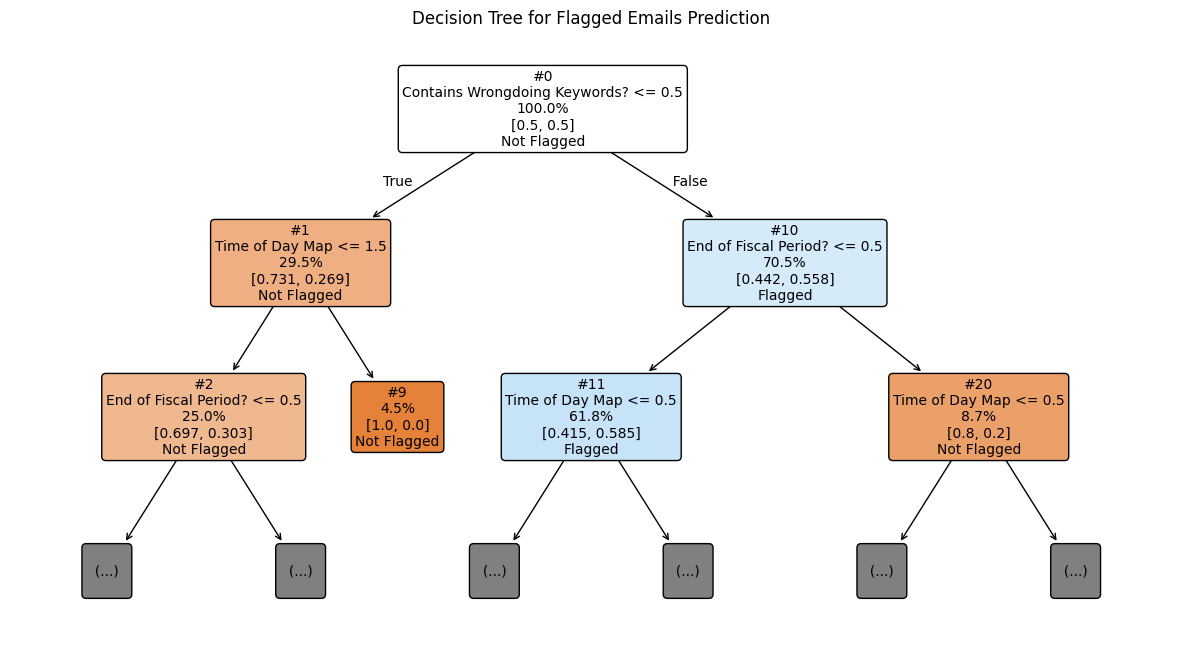


Feature Importance:
                         Feature  Importance
2  Contains Wrongdoing Keywords?    0.411342
0                Time of Day Map    0.280657
1          End of Fiscal Period?    0.263958
3                Keyword Density    0.040417
4            Outside Work Hours?    0.003626


In [57]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import pandas as pd

# Input X columns. Our independent variables.
inputs = ['Time of Day Map',
          'End of Fiscal Period?',
          'Contains Wrongdoing Keywords?',
          'Keyword Density',
          'Outside Work Hours?']

# Target is the column you want to predict. # WIP - we have not coded which emails were fraudulent. Will use 1 for wrongdoing, 0 for no wrongdoing.
target = 'Wrongdoing_Flag'  # Temporary Y variable until we code for wrongdoing.

# Step 1: Prepare feature and target data
X = merged_df[inputs]  # Feature columns
y = merged_df[target]  # Target column

# Step 2: Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create and train the decision tree classifier with balanced class weights
clf = DecisionTreeClassifier(random_state=42, class_weight='balanced', max_depth=5, min_samples_split=10, min_samples_leaf=5)

# Step 4: Cross-validation for better model evaluation
cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validated accuracy scores: {cv_scores}")
print(f"Average cross-validated accuracy: {cv_scores.mean():.2f}")

# Train the model
clf.fit(X_train, y_train)

# Step 5: Predict the target on the test set
y_pred = clf.predict(X_test)

# Step 6: Evaluate the performance of the model
print(f"Accuracy on test set: {accuracy_score(y_test, y_pred):.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 7: Visualize the decision tree with Georgia Tech colors
plt.figure(figsize=(15, 8))  # Increase figure size to provide more space

# Generate the tree plot with simpler settings
plot_tree(
    clf,
    feature_names=inputs,
    class_names=['Not Flagged', 'Flagged'],
    filled=True,
    fontsize=10,        # Reduce font size for clarity
    max_depth=2,        # Further limit the depth for simplicity
    impurity=False,     # Hide impurity values for better clarity
    proportion=True,    # Show proportions for simplicity
    rounded=True,       # Rounded corners for cleaner look
    node_ids=True,      # Add node ids for easier identification
    label='none'        # Remove labels to declutter the plot
)

# Get the current axis and adjust node colors manually
ax = plt.gca()

# Loop through the nodes and adjust their face colors
for node in ax.findobj(match=plt.Rectangle):
    if node.get_facecolor() == (0.8, 0.8, 0.8, 1):  # The default light grey color
        node.set_facecolor('#B3A369')  # Georgia Tech Gold
    elif node.get_facecolor() == (0.0, 0.5, 0.0, 1):  # Green for "Not Flagged"
        node.set_facecolor('#005A8D')  # Georgia Tech Blue

plt.title("Decision Tree for Flagged Emails Prediction")
plt.show()

# Step 8: Print feature importance to understand which features are most influential
feature_importance = pd.DataFrame({
    'Feature': inputs,
    'Importance': clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# OBSOLETE
- User Sentiment
  - We use another sentiment model earlier in the pipeline.

In [ ]:
"""
# User Sentiment library
from textblob import TextBlob

# Function to classify sentiment based on polarity
def classify_sentiment_textblob(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity

    # Classify based on polarity
    if polarity > 0.1:
        return "Urgent"  # Positive polarity indicates urgency (adjust threshold as needed)
    elif polarity < -0.1:
        return "Tense"  # Negative polarity indicates tense/negative sentiment
    else:
        return "Neutral"  # Neutral polarity indicates neutral sentiment

# Apply the classification function to each row in the 'text' column
main['Sentiment'] = main['text'].apply(classify_sentiment_textblob)

# Check the result
print(main[['text', 'Sentiment']].head())
"""

Accuracy: 1.00
Confusion Matrix:
[[6373    0]
 [  13    0]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6373
           1       0.00      0.00      0.00        13

    accuracy                           1.00      6386
   macro avg       0.50      0.50      0.50      6386
weighted avg       1.00      1.00      1.00      6386



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


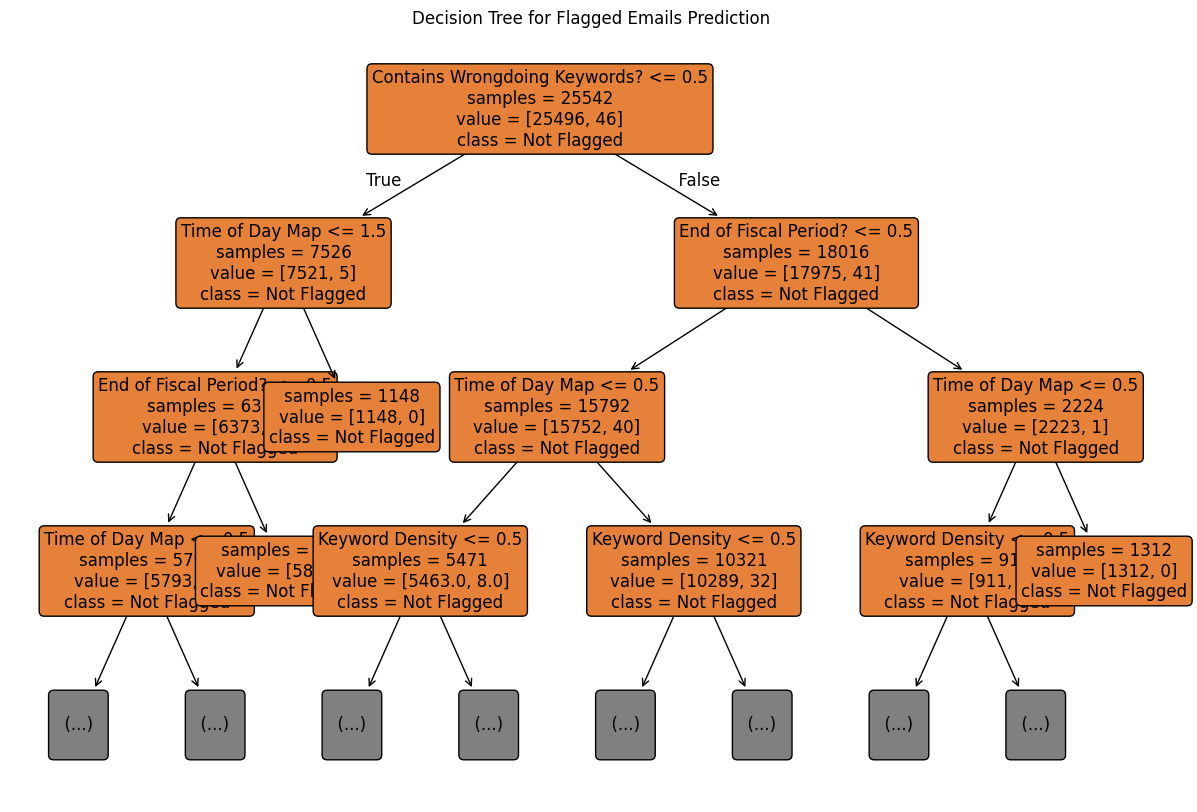

In [46]:
%%script false --no-raise-error   # Prevents execution

# Step 5: Evaluate the performance of the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Set figure size to make the tree more readable
plt.figure(figsize=(15, 10))

# Visualize the decision tree
plot_tree(
    clf,
    feature_names=inputs,
    class_names=['Not Flagged', 'Flagged'],
    filled=True,
    fontsize=12,        # Increase font size
    max_depth=3,        # Limit the depth for simplicity
    impurity=False,     # Hide impurity values for better clarity
    proportion=False,   # Show the actual sample counts
    rounded=True        # Rounded corners for a cleaner look
)

plt.title("Decision Tree for Flagged Emails Prediction")
plt.show()